## Cardio Good Fitness Project!
<strong> Objective </strong> - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

<b>You are expected to do the following: </b>

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

<h2><i><b>For those grading this project there is an executive summary at the end of the notebook. </i></b></h2>

#### We start off by importing the libaries needed to run the project

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

#### The next step is importing the csv data

In [108]:
data = pd.read_csv('CardioGoodFitness.csv')


#### Using some of the built in methods to understand more about the data

In [7]:
## The info method allows us to understand the: Dtypes, columns and the amount of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
## This method will give a highlevel view in each of the datasets that are not objects
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Understanding the structure of the data
#### This report will allow a manal exploration of the data to highlight some of the basis of the data such as: 
- Shape of the data
- The types of that are included in the data
- Are there any missing values
- Statistical information that could be valuable to the Fitness company

In [10]:
#The built in profile report for pandas gives us the ability to discover a variety of useful information
profile = ProfileReport(data)
profile.to_widgets()

### Key information about the data and the structure

   #### Overview
1. There are no duplicate rows
2. There are no missing cells. This means that the data has been cleaned and can be used in a deeper analysis
3. There are 180 unique customers
4. There are nine categories. 

#### Correlations
When we look at all of the customers as one population the strongest correlation is the fiteness leve and useage to the amount of miles, which is not a real shock being that this is self reported expectations by customers. If this was a fitness test and miles tracked it might show a differnt outcome. At this point all we can understand is there is a correlation. 

This is also a possible correlation between the age of the customer and their income. 

#### Using a heatmap to understand correlation amonst varaiables

This is another way to look at correlation to get a sense of the items that are connected. 

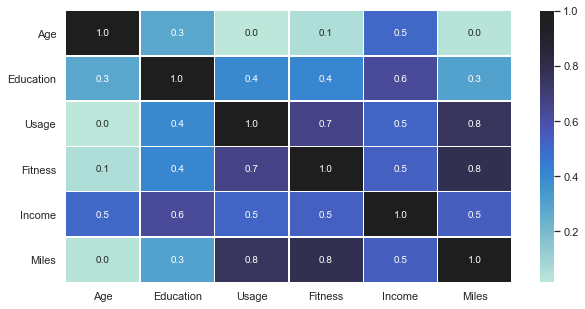

In [109]:
# Create a heatmap to visually understand correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Take a closer look at Product

<AxesSubplot:xlabel='Product', ylabel='Count'>

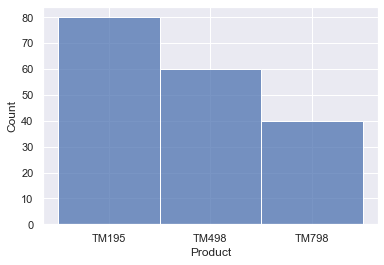

In [15]:
#Visualize the count breakdown of the customers by product type
sns.histplot(data['Product'],bins=3)

<AxesSubplot:xlabel='Product', ylabel='Income'>

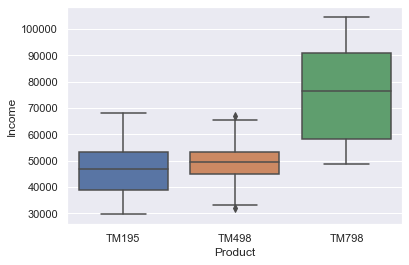

In [19]:
#Visualize the breakdown of income of customer by product
sns.boxplot(x="Product", y="Income", data=data)

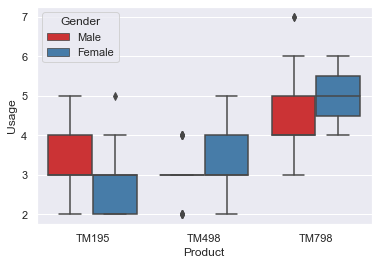

In [23]:
#Understanding usage in relation to gender and product
sns.boxplot(x="Product", y="Usage", hue="Gender",data=data, palette="Set1");

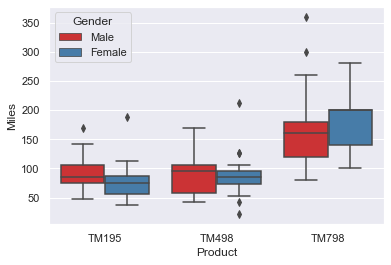

In [22]:
# Understand the product breakdown in relation to miles and gender
sns.boxplot(x="Product", y="Miles", hue="Gender",data=data, palette="Set1");

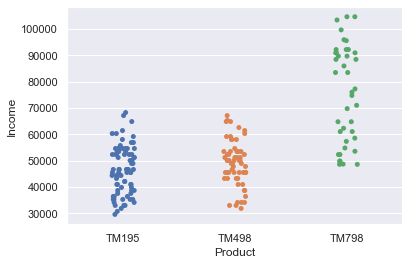

In [27]:
# Understanding the spread of income by prodcut
sns.stripplot(x='Product',y='Income',data=data,jitter=True)
plt.show()

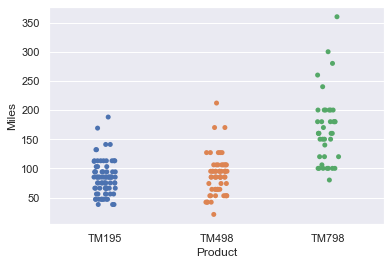

In [26]:
# this allows us to understnad the spred of how many miles each customer runs
sns.stripplot(x='Product',y='Miles',data=data,jitter=True)
plt.show()

### Understanding of Product

- There are <b>3</b> distinct products
- There are <b>no missing</b> values in the data
- There are <b>80</b> customers that use TM195
- There are <b>60</b> customers that use TM498
- There are <b>40</b> customers that use TM798

- TM798 are the set of customers that make the most money. The lowest earner is at higher than the mean of TM195 and almost the same as the mean earner for TM498
- TM798 users are more daily users than any other product
- The female population of the TM798 makes up the majority of users above 4 days a week

### Take a closer look at Age

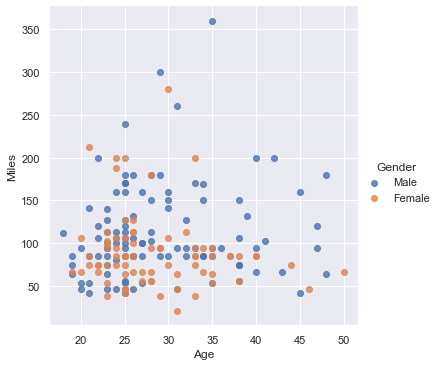

In [36]:
sns.lmplot(x='Age',y='Miles',data=data,fit_reg=False,hue='Gender')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

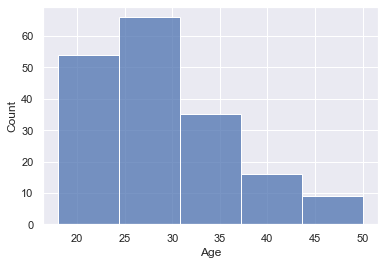

In [47]:
sns.histplot(data['Age'],bins=5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

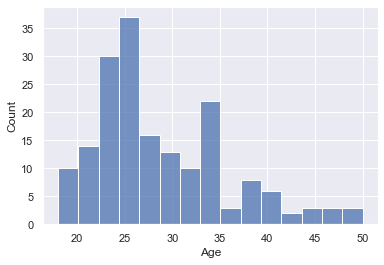

In [48]:
sns.histplot(data['Age'],bins=15)

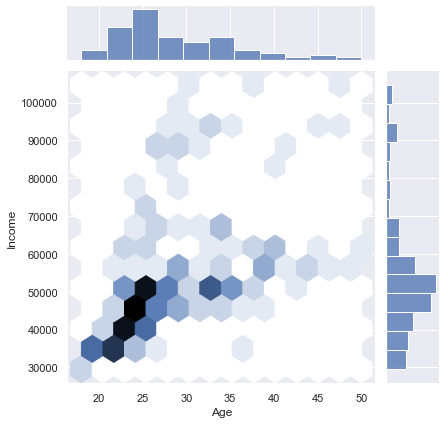

In [49]:
sns.jointplot(x="Age", y="Income",kind='hex', data=data);

### Understanding of Age
- There are <b>32</b> distinct ages 
- There are <b>no missing</b> values in the data
- The range of customer is from <b>18 to 50 </b> years in age
- The mean age of the customer is about <b>29</b> years old (28.788)

- The majortiy of the customers that are younger than 28 make less than $50k a year

### Take a look at gender

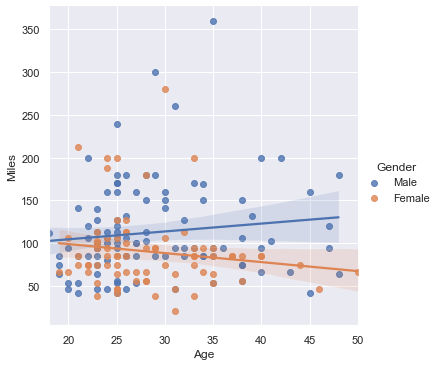

In [54]:
sns.lmplot(x='Age',y='Miles',data=data,fit_reg=True,hue='Gender')
plt.show()

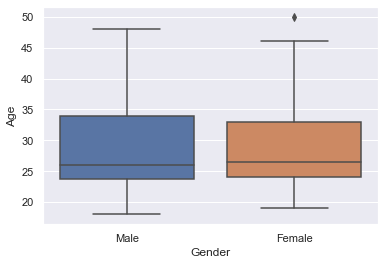

In [59]:
sns.boxplot(x='Gender',y='Age',data=data)
plt.show()

### Understanding of Gender
- There are <b>2</b> distinct genders
- There are <b>no missing</b> values in the data
- There are a total of <b>104</b> males and <b>76</b> females

### Take a closer look at Education

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


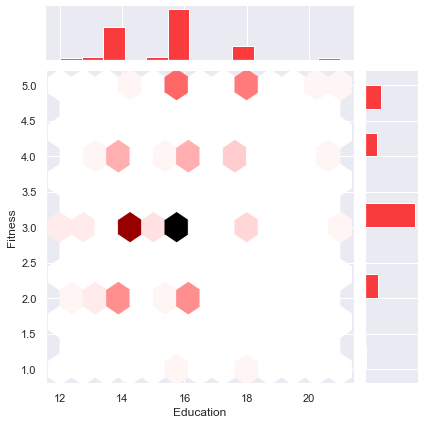

In [51]:
sns.jointplot(data['Education'], data['Fitness'], kind = "hex",color='red')
plt.show()

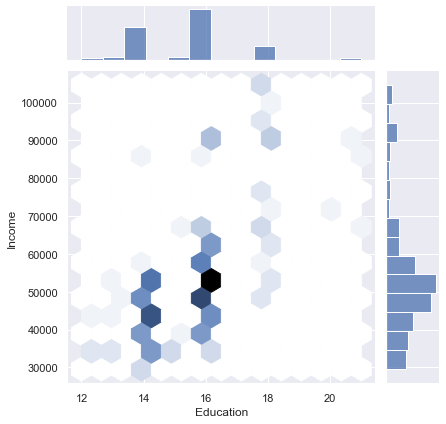

In [52]:
sns.jointplot(x="Education", y="Income",kind='hex', data=data);

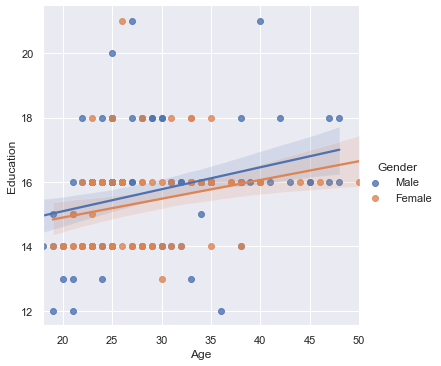

In [53]:
sns.lmplot(x='Age',y='Education',data=data,fit_reg=True,hue='Gender')
plt.show()

### Understanding of Education
- There are <b>8</b> distinct differance in the education variable
- There are <b>no missing</b> values in the data
- The majority of th customers have a mean of 15.57 years as a customer
- The longest standing customer is 21 years and the newset customer is 12 years

### Take a closer look at Marital Status

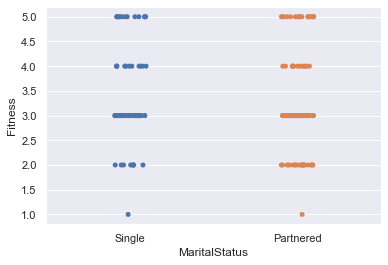

In [55]:
sns.stripplot(x='MaritalStatus',y='Fitness',data=data,jitter=True)
plt.show()

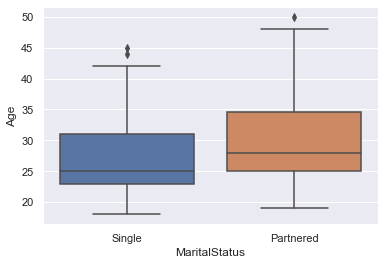

In [62]:
#Understand the breakdown of age vs martial status
sns.boxplot(x='MaritalStatus', y='Age', data=data)
plt.show()

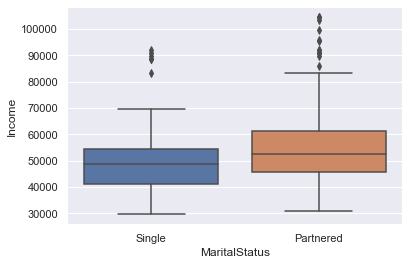

In [64]:
#Understand the breakdown of income vs martial status
sns.boxplot(x='MaritalStatus', y='Income', data=data)
plt.show()

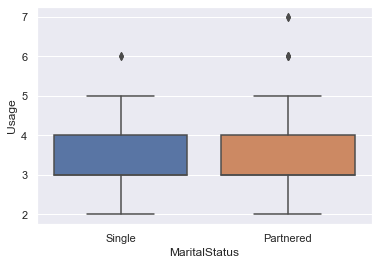

In [65]:
#Understand the breakdown of age vs martial status
sns.boxplot(x='MaritalStatus', y='Usage', data=data)
plt.show()

### Understanding of MaritalStatus
- There are <b>2</b> distinct attributes in this variable
- There are <b>no missing</b> values in the data
- The majority of the customers are Partnered with 107 being partnered and 73 being single

### Take a closer look at usage

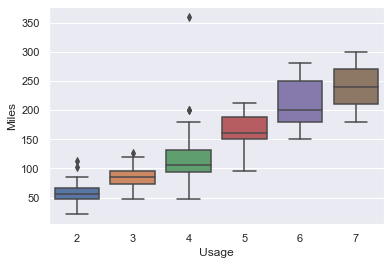

In [67]:
#Understand the breakdown of age vs martial status
sns.boxplot(x='Usage', y='Miles', data=data)
plt.show()

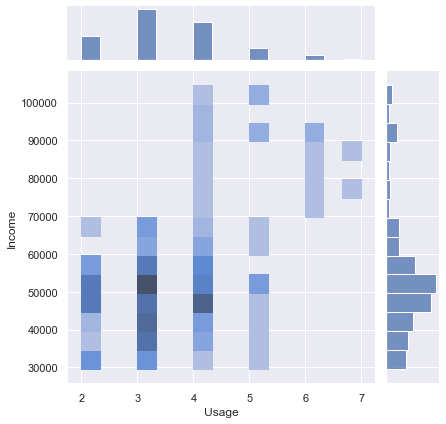

In [45]:
sns.jointplot(x="Usage", y="Income",kind='hist', data=data);

### Understanding of Usage
- There are <b>6</b> distinct attributes in this variable starting at 2 days and ranging up to 7 days
- There are <b>no missing</b> values in the data
- The mean of this variable is 3.45

### Take a closer look at Fitness

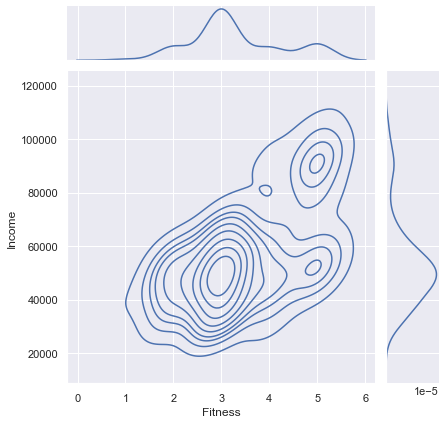

In [70]:
#Understand how income and fitness level are related
sns.jointplot(x="Fitness", y="Income",kind='kde', data=data);

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

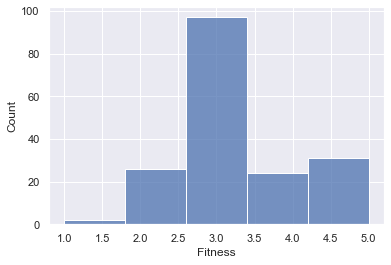

In [73]:
#Get an understanding of a breakdown for each fitness category
sns.histplot(data['Fitness'],bins=5)

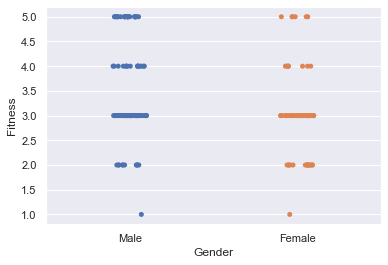

In [75]:
sns.stripplot(x='Gender',y='Fitness',data=data,jitter=True)
plt.show()

### Understanding of Fitness
- There are <b>5</b> distinct attributes in this variable 
- There are <b>no missing</b> values in the data
- The mean of this variable is 3.31
- The mode of this variable is 3
- Only two customers have listed themselves as a level 1
- Level 5 has more users than levels 3 and 4 when compared 1 to 1

### Take a closer look at Income

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

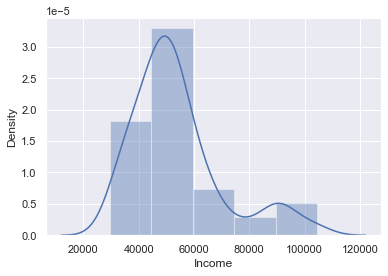

In [35]:
#Use distplot to see the spread of income 
sns.distplot(data['Income'],bins=5)

<AxesSubplot:xlabel='Income', ylabel='Count'>

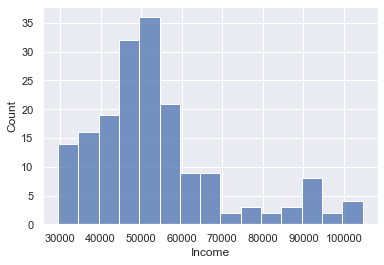

In [34]:
#Use the new histplot to see the spread of income using more bins
sns.histplot(data['Income'],bins=15)

### Understanding of Income
- There are 62 distinct attributes in this variable
- There are no missing values in the data
- The mean income is<b> $53719.58</b> for the entire group

- The minimum is $29,562
    
- The maximum is $104,581

- Less than 30 users make more than 70k a year
- There are not many earners that make above $70k a year

### Take a closer look at Miles

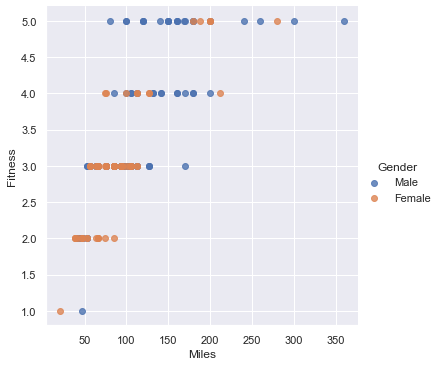

In [43]:
#This showcases the amount of miles vs the fitness level they feel they are in
sns.lmplot(x='Miles',y='Fitness',data=data,fit_reg=False,hue='Gender')
plt.show()

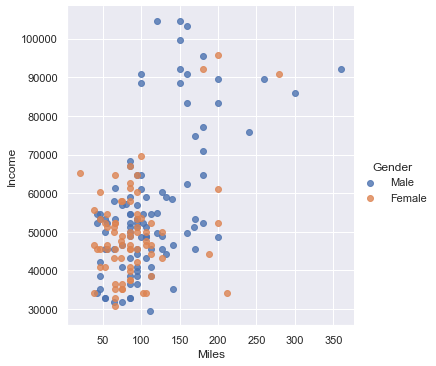

In [44]:
#This showcases the amount of miles vs the fitness level they feel they are in
sns.lmplot(x='Miles',y='Income',data=data,fit_reg=False,hue='Gender')
plt.show()

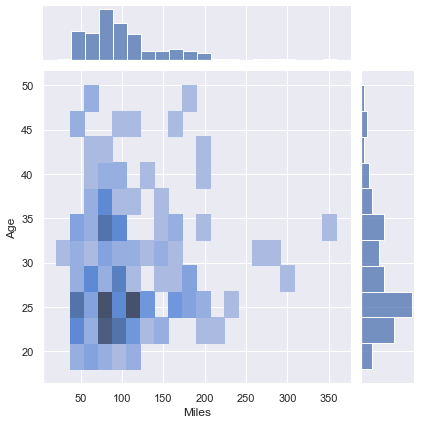

In [46]:
sns.jointplot(x="Miles", y="Age",kind='hist', data=data);

### Understanding of Miles
- There are 37 distinct attributes in this variable
- There are no missing values in the data
- The mean of the miles is 103.194
- The minimum amount of miles someone is going to run will be 21
- The maximum is 360 miles
- There are five customers who are above 250 miles, which is pulling the mean up a lot

# Taking a close look into each product

### Taking a look at TM195

In [91]:
TM195_df = data[data['Product'] == 'TM195']
TM195_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [94]:
profile_TM195_df = ProfileReport(TM195_df)
profile_TM195_df.to_widgets()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


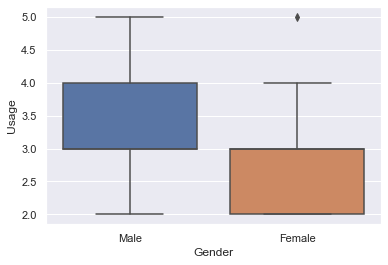

In [93]:
sns.boxplot(x = 'Gender',y = 'Usage',  data = TM195_df)
plt.show()

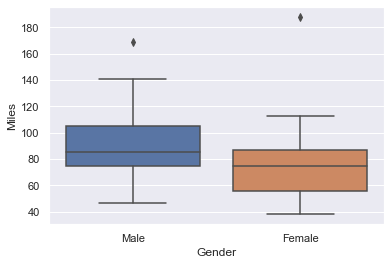

In [79]:
sns.boxplot(x = 'Gender',y = 'Miles',  data = TM195_df)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Count'>

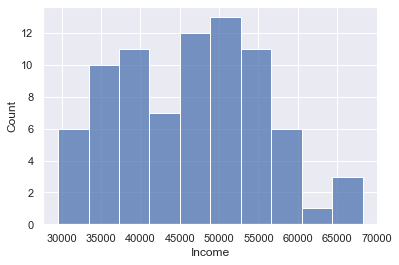

In [88]:
#Use the new histplot to see the spread of income using more bins
sns.histplot(TM195_df['Income'],bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


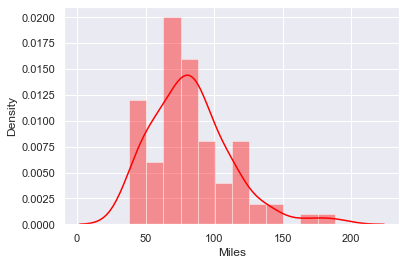

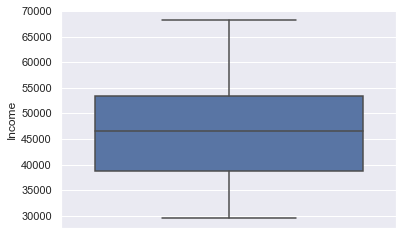

In [115]:
#Take a closer look at miles ran and income in two differnt charts
sns.distplot(TM195_df['Miles'],color='red')
plt.show()
sns.boxplot(y='Income',data=TM195_df)
plt.show()

#### TM195 Customer Profile
- These customers are our tourist, but they help pay the bills by making up a good amount of our customer population.
- These customers run less less than 100 miles on average
- These customers have the largest spread of income and make up 80 total customers. 
- They have an equal amount of males and females
- This is our trendy running group.

This is a customer group that we can tailor our general running products to. They will use our club less, but they are such a large group we want to make sure we have more of these treadmills due to the amount of volume they provide. If our club grows this is probally where some of the walk in customers will come into play. If we could do on screen ads I would target this group with some of the more trendy content that is avaible. They are still avid runners, but not so extreme that they do not understand main stream products. 


### Taking a look at TM498

In [95]:
TM498_df = data[data['Product'] == 'TM498']
TM498_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [96]:
profile_TM498_df = ProfileReport(TM498_df)
profile_TM498_df.to_widgets()

<AxesSubplot:xlabel='Income', ylabel='Count'>

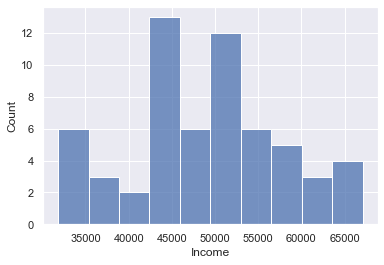

In [89]:
#Use the new histplot to see the spread of income using more bins
sns.histplot(TM498_df['Income'],bins=10)

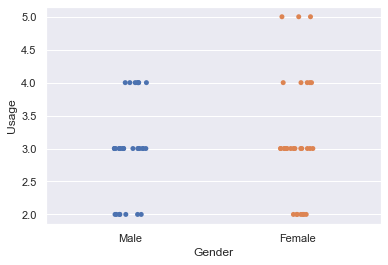

In [113]:
# Get an understanding of usage related to gender for TM498 product
sns.stripplot(x='Gender',y='Usage',data=TM498_df,jitter=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


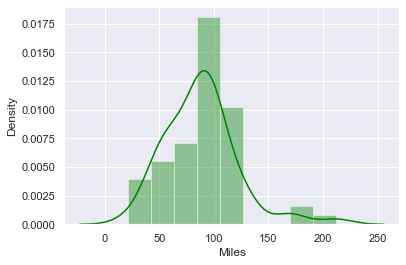

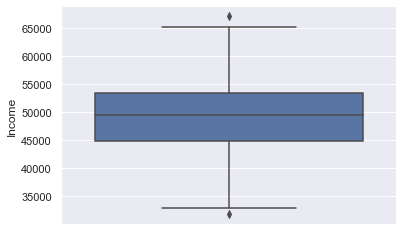

In [114]:
#Take a closer look at miles ran and income in two differnt charts
sns.distplot(TM498_df['Miles'],color='green')
plt.show()
sns.boxplot(y='Income',data=TM498_df)
plt.show()

#### TM498 Customer Profile
- This product captures the second largest group of our population
- The income for this product is a bit wide, but is around $50k 
- This group is very simlar to the TM195 group
- This group runs less than a 100 miles a week

TM498 probally makes up our second group of runners that are a bit serious for our club; however, they are not so extreme as we will see in the final product TM798. This product is such a simlar product with a simlar group of users; however, we are now starting to see a few users, which are only female have five days of useage. There is not a lot of these customers, but this was not seen in the TM195 group. I would suggest that we have a simlar target ads group as we did to our first prodcut the TM195. I would possibly increase these products if we feel our ratio is off based on forecasting for upcoming years increase in customers. There is a large change that new customers would fit into this group. These are still extrme runners, but not so extrme. 

### Taking a look at TM798

In [107]:
#Create a table to understand the overall scope of the data for TM798
TM798_df = data[data['Product'] == 'TM798']
TM798_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [103]:
profile_TM798_df = ProfileReport(TM798_df)
profile_TM798_df.to_widgets()

<AxesSubplot:xlabel='Income', ylabel='Count'>

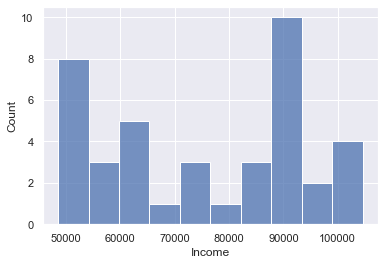

In [90]:
#Use the new histplot to see the spread of income using more bins
sns.histplot(TM798_df['Income'],bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


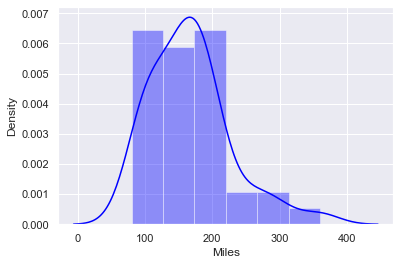

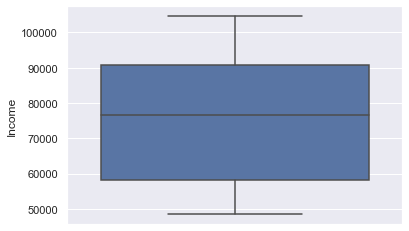

In [112]:
#Take a closer look at miles ran and income in two differnt charts
sns.distplot(TM798_df['Miles'],color='blue')
plt.show()
sns.boxplot(y='Income',data=TM798_df)
plt.show()

#### TM798 Customer Profile
- These are the loyal customers that we have had for a long time
- This product has only 7 females using it, but they can hang wtih ease. Thier numbers are right up there with their male counterparts. 
- The one customer who runs 80 miles per week is male
- This group is made up of our highest earners
- These are the go getters; the people who want to win at all costs. 

Brining in some high-end ads and boutique products would be perfect for this customer. We will need to satisfy the taste for these customers to want to win. They are willing to win and compete with their peers. I would also think that this group would be a wonderful target to start a competition in relation to fastest runner, the runner that ran the most each year. The numbers that these personal are putting up in relation to number of visits and distance in miles could allow us to showcase the club in a home for excellence. Also, the majority of the females in this group run more often and farther than their male counterparts. Sponsoring the women in this group would be a good idea for local races being that there are only seven of them and they can drive traffic to our establishment. 

# Executive Summary
## Understanding the structure of the data
1. 180 Customers in the dataset
2. There are no duplicate rows
3. There are no missing cells. This means that the data has been cleaned and can be used in a deeper analysis
4. There are 180 unique customers
5. There are nine categories. 

#### Interesting takeaways: 
- Level 1 or level 2 do not have any customers running more than 100 miles

- The majority of the customers make close to $50,000 a year 

- Those customers that plan to use the club more than five times a week all make more than $70,000 a year

- No customers over the age of 40 is running further than 200 miles

- Two of the top ten highest earners do not run over 200 miles


- The majority of the customers plan to run 100 miles a week, which tells me that our target audience are those individuals who really love to succeed and find themselves striving towards things that set them out different than others. The large number of 100 miles a week just seems cruel for most, but these customers feel like this number fuels the rest of their day. They are not just waking up to make their bed; instead they want to enter the day as giants knowing that they are tackling something so hard that no mere mortal could possibly do it. They are doing this each week not just once in a while. This is can also be understood with the mean of miles at 103.  Here is a good article that can help us understand how someone might plan their week to make this possible: https://www.fastrunning.com/training/marathon-training/the-mystical-100-mile-week/12772


## Product Break Down

#### TM195 Customer Profile
- These customers are our tourist, but they help pay the bills by making up a good amount of our customer population.
- These customers run less less than 100 miles on average
- These customers have the largest spread of income and make up 80 total customers. 
- They have an equal amount of males and females
- This is our trendy running group.

This is a customer group that we can tailor our general running products to. They will use our club less, but they are such a large group we want to make sure we have more of these treadmills due to the amount of volume they provide. If our club grows this is probally where some of the walk in customers will come into play. If we could do on screen ads I would target this group with some of the more trendy content that is avaible. They are still avid runners, but not so extreme that they do not understand main stream products.


#### TM498 Customer Profile
- This product captures the second largest group of our population
- The income for this product is a bit wide, but is around $50k 
- This group is very simlar to the TM195 group
- This group runs less than a 100 miles a week

TM498 probally makes up our second group of runners that are a bit serious for our club; however, they are not so extreme as we will see in the final product TM798. This product is such a simlar product with a simlar group of users; however, we are now starting to see a few users, which are only female have five days of useage. There is not a lot of these customers, but this was not seen in the TM195 group. I would suggest that we have a simlar target ads group as we did to our first prodcut the TM195. I would possibly increase these products if we feel our ratio is off based on forecasting for upcoming years increase in customers. There is a large change that new customers would fit into this group. These are still extrme runners, but not so extrme. 

#### TM798 Customer Profile
- These are the loyal customers that we have had for a long time
- This product has only 7 females using it, but they can hang wtih ease. Thier numbers are right up there with their male counterparts. 
- The one customer who runs 80 miles per week is male
- This group is made up of our highest earners
- These are the go getters; the people who want to win at all costs. 

Brining in some high-end ads and boutique products would be perfect for this customer. We will need to satisfy the taste for these customers to want to win. They are willing to win and compete with their peers. I would also think that this group would be a wonderful target to start a competition in relation to fastest runner, the runner that ran the most each year. The numbers that these personal are putting up in relation to number of visits and distance in miles could allow us to showcase the club in a home for excellence. Also, the majority of the females in this group run more often and farther than their male counterparts. Sponsoring the women in this group would be a good idea for local races being that there are only seven of them and they can drive traffic to our establishment. 

### Understanding of Product

- There are <b>3</b> distinct products
- There are <b>no missing</b> values in the data
- There are <b>80</b> customers that use TM195
- There are <b>60</b> customers that use TM498
- There are <b>40</b> customers that use TM798

- TM798 are the set of customers that make the most money. The lowest earner is at higher than the mean of TM195 and almost the same as the mean earner for TM498
- TM798 users are more daily users than any other product
- The female population of the TM798 makes up the majority of users above 4 days a week

### Understanding of Age
- There are <b>32</b> distinct ages 
- There are <b>no missing</b> values in the data
- The range of customer is from <b>18 to 50 </b> years in age
- The mean age of the customer is about <b>29</b> years old (28.788)

- The majortiy of the customers that are younger than 28 make less than $50k a year

### Understanding of Gender
- There are <b>2</b> distinct genders
- There are <b>no missing</b> values in the data
- There are a total of <b>104</b> males and <b>76</b> females
- 7 of those females are some of the most frequent visitors of the club and in the top 20% in miles

### Understanding of Education
- There are <b>8</b> distinct differance in the education variable
- There are <b>no missing</b> values in the data
- The majority of th customers have a mean of 15.57 years as a customer
- The longest standing customer is 21 years and the newset customer is 12 years

### Understanding of MaritalStatus
- There are <b>2</b> distinct attributes in this variable
- There are <b>no missing</b> values in the data
- The majority of the customers are Partnered with 107 being partnered and 73 being single
- There are no major correlations for this category

### Understanding of Usage
- There are <b>6</b> distinct attributes in this variable starting at 2 days and ranging up to 7 days
- There are <b>no missing</b> values in the data
- The mean of this variable is 3.45

### Understanding of Fitness
- There are <b>5</b> distinct attributes in this variable 
- There are <b>no missing</b> values in the data
- The mean of this variable is 3.31
- The mode of this variable is 3
- Only two customers have listed themselves as a level 1
- Level 5 has more users than levels 3 and 4 when compared 1 to 1

### Understanding of Income
- There are 62 distinct attributes in this variable
- There are no missing values in the data
- The mean income is<b> $53719.58</b> for the entire group

- The minimum is $29,562
    
- The maximum is $104,581

- Less than 30 users make more than 70k a year

### Understanding of Miles
- There are 37 distinct attributes in this variable
- There are no missing values in the data
- The mean of the miles is 103.194
- The minimum amount of miles someone is going to run will be 21
- The maximum is 360 miles
- There are five customers who are above 250 miles, which is pulling the mean up a lot